# Project Overview

## Background
In the era of digital music streaming, the sheer volume of available tracks can be overwhelming for users. Music recommendation systems have become essential tools for helping users discover new music that aligns with their tastes. These systems analyze user preferences and listening habits to suggest tracks, artists, and albums that users are likely to enjoy.

## Importance
Completing this project is crucial for several reasons:
1. **Enhanced User Experience**: A well-designed recommendation system can significantly improve user satisfaction by providing personalized music suggestions.
2. **Increased Engagement**: By offering relevant recommendations, users are more likely to spend more time on the platform, exploring new music.
3. **Revenue Growth**: For music streaming services, increased user engagement often translates to higher subscription rates and ad revenue.
4. **Competitive Advantage**: A robust recommendation system can set a music streaming service apart from its competitors, attracting and retaining more users.

# Business Understanding

## Problem Statements
1. **Top 10**: What are the Top 10 Albums with Most Songs, Top 10 Music Genres Based on Highest Average Popularity, Top 10 Genres with the Highest Number of Unique Artists, Top 10 Artists by Average Popularity Score, and Top 10 Artists by Number of Tracks?
2. **Recommendation System**: How can we create the best recommendation system that can be implemented?

## Goals
The primary goals of this project are:
1. **Data Analysis and Insights**:
   - Identify the **Top 10 Albums** with the most songs.
   - Determine the **Top 10 Music Genres** based on the highest average popularity.
   - Find the **Top 10 Genres** with the highest number of unique artists.
   - Identify the **Top 10 Artists** by average popularity score.
   - Determine the **Top 10 Artists** by the number of tracks.

   These tasks aim to provide insights into the music dataset, highlighting popular albums, genres, and artists based on various metrics.

2. **Create a Recommendation System**:
   - Develop a recommendation system to suggest music to users. This system should be designed to provide personalized music recommendations based on track name.

## Solution Approach
To achieve these goals, we propose two solution approaches:

1. **Data Analysis and Insights**:
   - Identify the **Top 10 Albums** with the most songs.
   - Determine the **Top 10 Music Genres** based on the highest average popularity.
   - Find the **Top 10 Genres** with the highest number of unique artists.
   - Identify the **Top 10 Artists** by average popularity score.
   - Determine the **Top 10 Artists** by the number of tracks.

   These tasks aim to provide insights into the music dataset, highlighting popular albums, genres, and artists based on various metrics.

2. **Create a Recommendation System**:
   - Develop a recommendation system using Content-based filtering to suggest music based on track name.
   - Develop a recommendation system using Collaborative filtering to suggest music based on track name.

# Import depedencies and load Data

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress specific FutureWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Machine learning and deep learning
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
spotify_track_dataset = pd.read_csv('https://raw.githubusercontent.com/ridwaanhall/applied-machine-learning/refs/heads/main/recomendation-system/spotify-tracks-dataset/dataset.csv')

# Data Understanding and Cleaning

## Variable and description

| Variable          | Description                                                                 |
|-------------------|----------------------------------------------------------------------------|
| track_id          | Unique identifier for the track on Spotify                                 |
| artists           | Artists associated with the track, separated by `;` if there is more than one artist |
| album_name        | Name of the album in which the track is featured                           |
| track_name        | Title of the track                                                         |
| popularity        | Popularity score of the track on a scale from 0 to 100, based on total number of plays |
| duration_ms       | Duration of the track measured in milliseconds                             |
| explicit          | Indicator of whether the track contains explicit lyrics (true = yes, false = no) |
| danceability      | Measure of the suitability of the track for dancing on a scale from 0 to 1, with 0 being not suitable and 1 being highly suitable |
| energy            | Measure of the intensity and activity of the track on a scale from 0 to 1, with 0 being very low and 1 being very high |
| key               | Key of the track using standard Pitch Class notation, e.g., 0 = C, 1 = C#, 2 = D |
| loudness          | Loudness of the track measured in decibels (dB)                            |
| mode              | Mode of the track's melodic content, with 0 indicating minor and 1 indicating major |
| speechiness       | Measure of the presence of spoken words in the track on a scale from 0 to 1, with 0 being rare and 1 being frequent |
| acousticness      | Confidence measure of whether the track is acoustic on a scale from 0 to 1, with 0 being no and 1 being yes |
| instrumentalness  | Measure of the instrumental nature of the track on a scale from 0 to 1, with 0 being not instrumental and 1 being purely instrumental |
| liveness          | Measure of the presence of a live audience in the track on a scale from 0 to 1, with 0 being no audience and 1 being a live audience |
| valence           | Measure of the musical positiveness conveyed by the track on a scale from 0 to 1, with 0 being negative (e.g., sad, angry) and 1 being positive (e.g., happy, euphoric) |
| tempo             | Tempo of the track measured in beats per minute                            |
| time_signature    | Time signature of the track, indicating the number of beats per measure, e.g., 4 represents a 4/4 time signature |
| track_genre       | Genre of the track                                                         |

## Inside of the dataset

In [4]:
spotify_track_dataset

,number,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In the results above, there are 114,000 rows and 21 columns. However, there is an anomaly in the dataset `number`, we gonna delete it.

## Rows and Column

In [5]:
total_row, total_column = spotify_track_dataset.shape
print(f"Total of rows  : {total_row}")
print(f"Total of column: {total_column}")

Total of rows  : 114000
Total of column: 21


## Info

In [6]:
spotify_track_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   number            114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

- 114,000 rows and 21 columns.
- Columns include various data types: int64, float64, object, and bool.
- Mostly complete data, with only three columns (`artists`, `album_name`, `track_name`) having one missing value each.
- The DataFrame uses 17.5+ MB of memory.

## Description

In [7]:
spotify_track_dataset.describe()

,number,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


- The dataset contains 114,000 entries across 21 columns.
- Numerical columns include a mix of integer (`int64`) and floating point (`float64`) types.
- The `popularity`, `duration_ms`, and other metrics have a broad range of values, indicating variability in the data.
- Some columns like `Unnamed: 0` might be an index or identifier.
- The presence of minimum values at 0 and maximum values significantly high suggests potential outliers or data entry issues.

## Data Cleaning

### Checking NaN

In [8]:
nan_counts = spotify_track_dataset.isnull().sum()
print("\nNaN counts per column:")
nan_counts


NaN counts per column:


,0
number,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [9]:
nan_rows = spotify_track_dataset[spotify_track_dataset.isnull().any(axis=1)]
print("Rows with NaN values:")
nan_rows

Rows with NaN values:


,number,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [10]:
nan_indices = np.where(spotify_track_dataset.isnull())
print("\nDetailed NaN locations:")
for row, col in zip(*nan_indices):
    print(f"Row: {row}, Column: {spotify_track_dataset.columns[col]}")


Detailed NaN locations:
Row: 65900, Column: artists
Row: 65900, Column: album_name
Row: 65900, Column: track_name


In [11]:
total_nan_count = spotify_track_dataset.isnull().sum().sum()
print(f"\nTotal number of NaN values: {total_nan_count}")


Total number of NaN values: 3


#### Dropna

In [12]:
spotify_track_dataset.dropna(inplace=True)

total_rows, total_columns = spotify_track_dataset.shape
print(f"Total rows   : {total_rows}")
print(f"Total columns: {total_columns}")

Total rows   : 113999
Total columns: 21


In [13]:
spotify_track_dataset.describe()

,number,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Here we know that all NaN values are deleted/dropped because the `max` values are different.

In [14]:
nan_indices = np.where(spotify_track_dataset.isnull())
print("\nDetailed NaN locations:")
for row, col in zip(*nan_indices):
    print(f"Row: {row}, Column: {spotify_track_dataset.columns[col]}")


Detailed NaN locations:


the detailed NaN location has deleted

### Check for Duplicates

In [15]:
spotify_track_dataset.duplicated().sum()

0

In [16]:
spotify_track_dataset[spotify_track_dataset.duplicated]

,number,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


no duplicate detected

### Deleting `number` column

In [17]:
spotify_track_dataset = spotify_track_dataset.drop(columns=["number"])

In [18]:
spotify_track_dataset

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


as we can see here, the `number` column has been deleted because we dont use the column.

## EDA

### Extract categorical columns and numerical columns

In [19]:
class ExtractColumn:
    def __init__(self, dataset: pd.DataFrame):
        self.dataset = dataset

    def extract_categorical_columns(self):
        return self.dataset.select_dtypes(include=["object", "bool"])

    def extract_numerical_columns(self):
        return self.dataset.select_dtypes(include=["float64", "int64"])

In [20]:
extractor = ExtractColumn(spotify_track_dataset)

In [21]:
extractor.extract_categorical_columns().head()

,track_id,artists,album_name,track_name,explicit,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic


In [22]:
extractor.extract_numerical_columns().head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4


Separating them allows for appropriate preprocessing and model selection, which can improve model performance.

In [24]:
class EDA:
    def __init__(self, dataset):
        self.dataset = dataset

    def top_10_artists_number_tracks(self):
        top_artists = self.dataset["artists"].value_counts().head(10).reset_index()
        top_artists.columns = ["artist", "frequency"]
        self._plot_bar(top_artists, "frequency", "artist", "Top 10 Artists by Number of Tracks", "Number of Tracks", "Artist")

    def top_10_albums_most_songs(self):
        top_albums = self.dataset["album_name"].value_counts().head(10).reset_index()
        top_albums.columns = ["album_name", "frequency"]
        self._plot_bar(top_albums, "frequency", "album_name", "Top 10 Albums with Most Songs", "Number of Songs", "Album")

    def top_10_genres_by_popularity(self):
        popularity_by_genre = self.dataset.groupby("track_genre")["popularity"].mean().reset_index()
        top_10_genres = popularity_by_genre.nlargest(10, "popularity")
        self._plot_bar(top_10_genres, "popularity", "track_genre", "Top 10 Genres by Average Popularity", "Average Popularity Score", "Genre", display_values=True)

    def top_10_genres_by_unique_artists(self):
        total_artists_by_genre = self.dataset.groupby("track_genre")["artists"].nunique().reset_index()
        top10_artist_genres = total_artists_by_genre.nlargest(10, "artists")
        self._plot_bar(top10_artist_genres, "artists", "track_genre", "Top 10 Genres by Number of Unique Artists", "Number of Artists", "Genre")

    def top_10_artists_by_popularity(self):
        average_popularity_by_artist = self.dataset.groupby("artists")["popularity"].mean().reset_index()
        top10_popular_artists = average_popularity_by_artist.nlargest(10, "popularity")
        self._plot_bar(top10_popular_artists, "popularity", "artists", "Top 10 Artists by Average Popularity Score", "Average Popularity Score", "Artists")

    def distribution_explicit_songs(self):
        unique_values, value_counts = np.unique(self.dataset["explicit"], return_counts=True)
        fig, ax = plt.subplots(figsize=(6, 6))
        colors = sns.color_palette("viridis", len(unique_values))
        explode = [0, 0.1]
        ax.pie(value_counts, labels=unique_values, autopct="%1.2f%%", startangle=90, colors=colors, explode=explode)
        ax.axis("equal")
        ax.set_title("Distribution of Explicit Lyrics Songs")
        plt.show()

    def _plot_bar(self, data, x_col, y_col, title, xlabel, ylabel, display_values=False):
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=x_col, y=y_col, data=data, palette="seismic", zorder=3, width=0.5)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        if display_values:
            for i, v in enumerate(data[x_col]):
                ax.text(v, i, f'{v:.1f}', va='center')
        plt.show()

eda = EDA(spotify_track_dataset)

### A. Distribution of Explicit Lyrics Songs

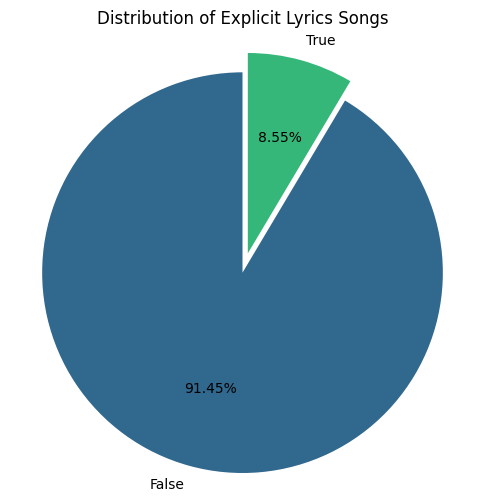

In [25]:
eda.distribution_explicit_songs()

The output of the pie chart showing "explicit 8.55%" indicates that 8.55% of the songs in dataset have explicit lyrics.

### B. Top 10 Albums with Most Songs

This plot provides a ranking of the top 10 albums based on the number of songs they contain, which could be useful information for someone looking to find albums with the most musical content.

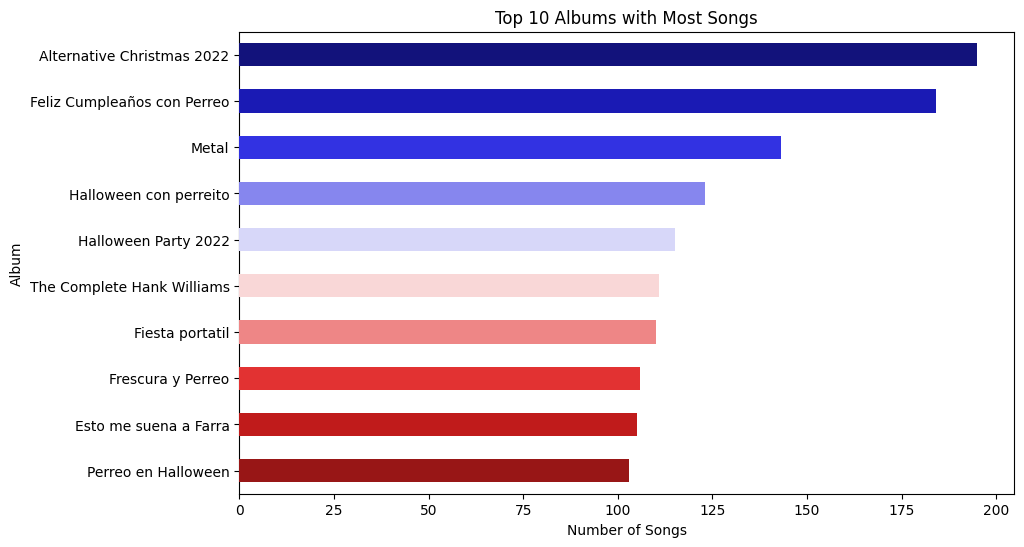

In [26]:
eda.top_10_albums_most_songs()

- The album "Alternative Christmas 2022" has the most songs with over 175 tracks, making it the album with the most songs in the top 10 list.
- The albums "Feliz Cumpleaños con Perreo", "Metal", and "Halloween con perreito" all have a similar number of songs, around 140-150 each.
-The album "The Complete Hank Williams" has the fewest number of songs, with just under 50 tracks.
- The remaining albums in the top 10 range from around 60 to 100 songs each.

### C. Top 10 Music Genres Based on Highest Average Popularity

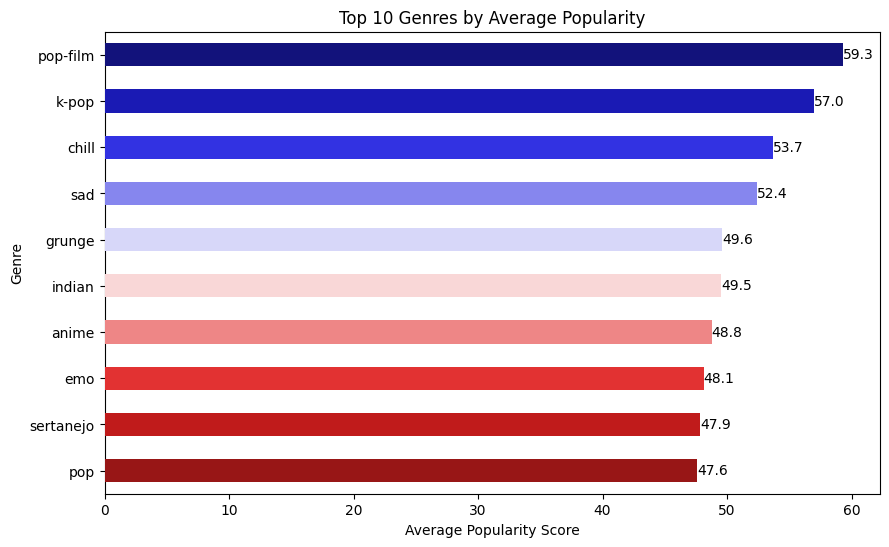

In [27]:
eda.top_10_genres_by_popularity()

- Pop-film is the most popular genre on average with a score of 59.3, followed by K-pop at 57.0 and chill at 53.7.
- The least popular genres on average are pop at 47.6 and sertanejo at 47.9.
- The spread between the most popular and least popular genres is quite large, around 11.7 points, suggesting significant variation in average popularity across different music/content genres.
- The genres can be roughly grouped into high popularity (pop-film, K-pop, chill), medium popularity (sad, grunge, indian), and lower popularity (anime, emo, sertanejo, pop).

### D. Top 10 genres with the highest number of unique artists

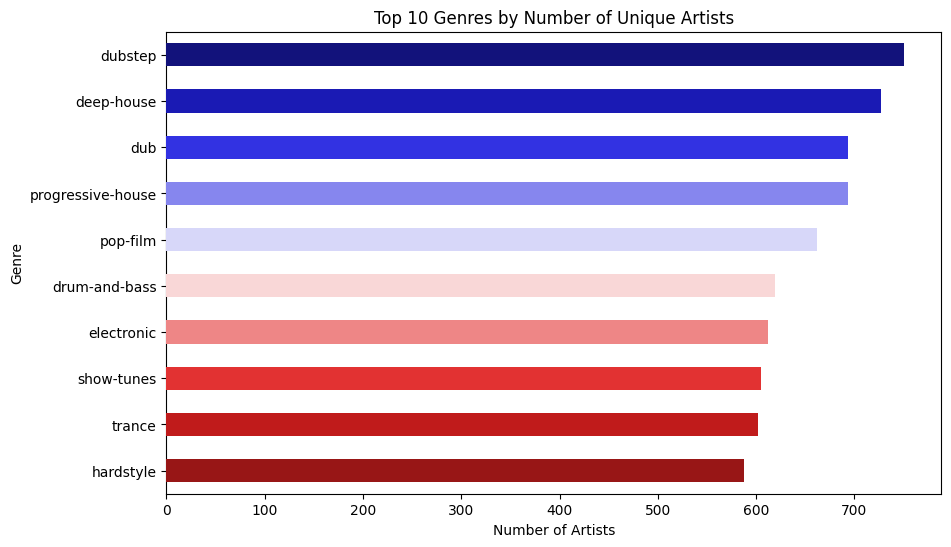

In [28]:
eda.top_10_genres_by_unique_artists()

- Dubstep has the highest number of unique artists among the top 10 genres, with around 650 artists. This suggests dubstep is a highly popular and diverse genre.
- Deep-house and dub also have a large number of unique artists, around 550 and 500 respectively, indicating these are also well-established and widely produced genres.
- Pop-film, which was the most popular genre by average score in the previous image, has a relatively lower number of unique artists at around 350. This suggests its popularity may be driven more by a few high-profile artists/works rather than a large pool of producers.
- The genres at the lower end of the spectrum, like show-tunes, trance, and hardstyle, have notably fewer unique artists, ranging from around 200 to 100. This implies these are more niche or specialized genres compared to the more mainstream ones.

### E. Top 10 Artists by Average Popularity Score

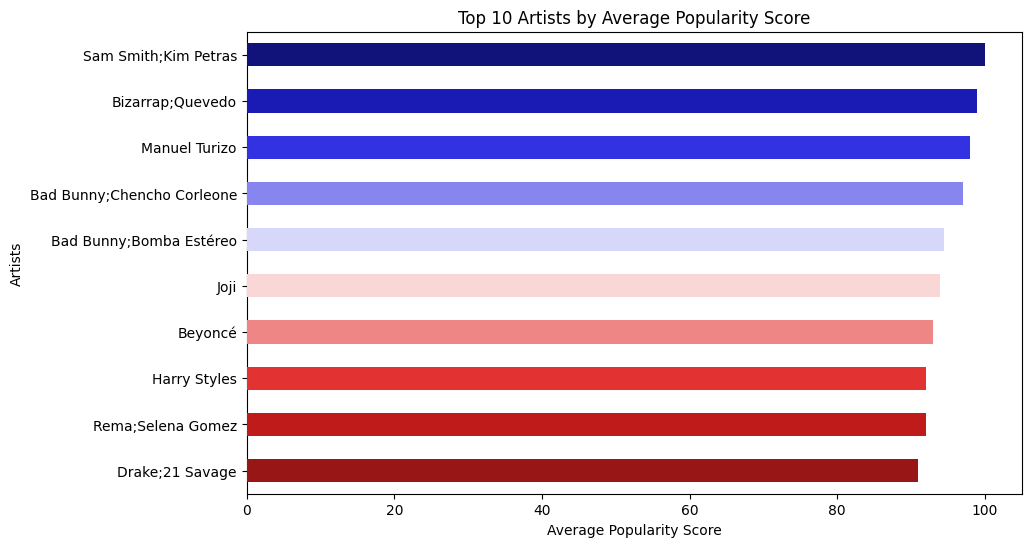

In [29]:
eda.top_10_artists_by_popularity()

- The artists with the highest average popularity scores are Sam Smith/Kim Petras and Bizarrap/Quevedo, both scoring over 90 points. This indicates they are among the most popular and well-known artists across the data set.
- Manuel Turizo, Bad Bunny/Chencho Corleone, and Bad Bunny/Bomba Estéreo also have very high average popularity scores, all over 80 points. These artists seem to have significant mainstream appeal and recognition.
- Moving down the list, Joji, Beyoncé, and Harry Styles have moderate popularity scores in the 60-70 range. This suggests they have strong fanbases but may not reach the same level of widespread popularity as the top artists.
- Rema/Selena Gomez and Drake/21 Savage have the lowest average popularity scores of the top 10, in the 50-60 point range. While still popular, they seem to have a more niche or specialized appeal compared to the top-ranked artists.

### F. Top 10 Artists by Number of Tracks

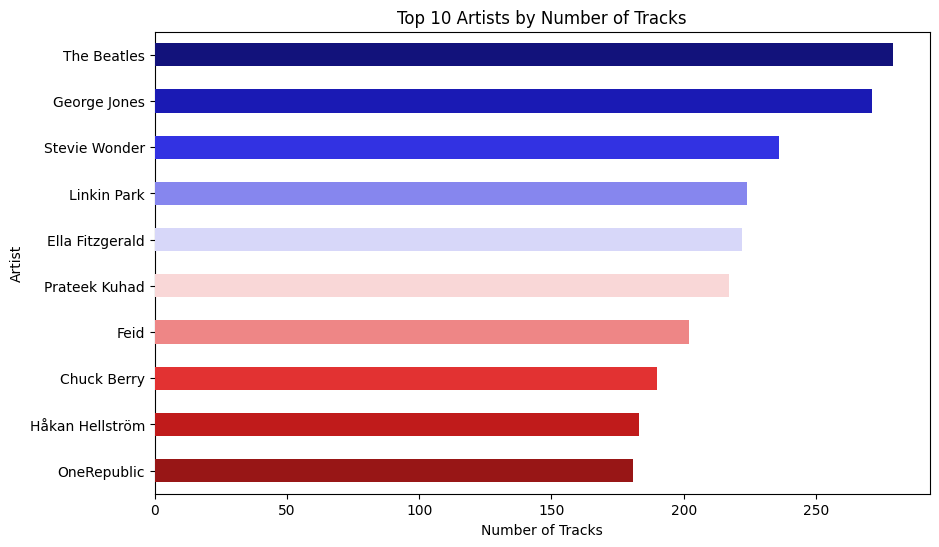

In [30]:
eda.top_10_artists_number_tracks()

- The Beatles have by far the highest number of tracks at over 200, significantly more than any other artist in the top 10. This suggests they have an incredibly extensive and prolific musical catalog.
- George Jones and Stevie Wonder also have very large track counts, in the 150-180 range, indicating they too have highly extensive and diverse bodies of work.
- Linkin Park and Ella Fitzgerald have moderately high track counts around 125-130, showing they have produced a significant amount of content but not quite at the level of the top 3 artists.
- The remaining artists - Prateek Kuhad, Feid, Chuck Berry, Håkan Hellström, and OneRepublic - have lower track counts ranging from about 100 down to 50. While still prolific, they do not seem to have the sheer volume of musical output as the top-ranked acts.
- The wide range in track counts, from over 200 down to 50, highlights the significant differences in the scale and depth of these artists' catalogs. The number of tracks is a good proxy for overall musical output and productivity.

# Content-Based Filtering

in this method, we use data preparation, model structure, train and evalute with mseloss, and get recomendations top N

In [ ]:
# Define a PyTorch model for content-based filtering
class ContentBasedModel(nn.Module):
    def __init__(self, input_dim):
        super(ContentBasedModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class ContentBasedRecommender:
    def __init__(self, dataset):
        self.dataset = dataset
        self.model = None
        self.tfidf_matrix = None
        self.cosine_sim_df = None

    def data_preparation(self):
        self.content_based_data = pd.DataFrame({
            "track_id": self.dataset["track_id"].tolist(),
            "track_name": self.dataset["track_name"].tolist(),
            "album_name": self.dataset["album_name"].tolist(),
            "track_genre": self.dataset["track_genre"].tolist()
        })
        print("Content Based Data:")
        return self.content_based_data.head()

    def create_tfidf_matrix(self):
        self.tf = TfidfVectorizer()
        self.tfidf_matrix = self.tf.fit_transform(self.content_based_data["track_genre"])
        print("TF-IDF Matrix Shape:")
        return self.tfidf_matrix.shape

    def calculate_cosine_similarity(self):
        cosine_sim = cosine_similarity(self.tfidf_matrix)
        self.cosine_sim_df = pd.DataFrame(cosine_sim, index=self.content_based_data["track_name"], columns=self.content_based_data["track_name"])
        print("Cosine Similarity DataFrame:")
        return self.cosine_sim_df.head()

    def initialize_model(self):
        input_dim = self.tfidf_matrix.shape[1]
        self.model = ContentBasedModel(input_dim=input_dim)
        print("Model Structure:")
        return self.model

    def train_model(self):
        # Convert tf-idf matrix to tensor
        X = torch.tensor(self.tfidf_matrix.todense(), dtype=torch.float32)
        y = torch.ones(X.size(0), 1)  # Dummy target variable for example

        criterion = nn.MSELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=0.001)

        epochs = 100
        for epoch in range(epochs):
            self.model.train()
            optimizer.zero_grad()
            outputs = self.model(X)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{epochs}], MSE Loss: {loss.item():.4f}')

    # def get_recommendations(self, track_name, k=10):
    #     if track_name not in self.cosine_sim_df.columns:
    #         return f"Track '{track_name}' not found in dataset."

    #     index = self.cosine_sim_df.loc[:, track_name].to_numpy().argpartition(range(-1, -k, -1))
    #     closest = self.cosine_sim_df.columns[index[-1:-(k+2):-1].flatten()]
    #     closest = closest.drop(track_name, errors="ignore")

    #     return pd.DataFrame(closest).merge(self.content_based_data).head(k)

    def get_recommendations(self, track_name, k=10):
        if track_name not in self.cosine_sim_df.columns:
            return f"Track '{track_name}' not found in dataset."

        # Ensure k does not exceed the number of available tracks
        k = min(k, len(self.cosine_sim_df) - 1)

        index = self.cosine_sim_df.loc[:, track_name].to_numpy().argpartition(range(-1, -k, -1))
        closest = self.cosine_sim_df.columns[index[-1:-(k+2):-1].flatten()]
        closest = closest.drop(track_name, errors="ignore")

        return pd.DataFrame(closest).merge(self.content_based_data).head(k)

class MusicRecommender:
    def __init__(self, recommender):
        self.recommender = recommender

    def get_user_input(self):
        track_name = input("Enter a track name: ")
        top_n = int(input("Enter the number of recommendations you want: "))
        return track_name, top_n

    def get_recommendations(self):
        track_name, top_n = self.get_user_input()
        recommendations = self.recommender.get_recommendations(track_name, top_n)
        return recommendations

recommender = ContentBasedRecommender(spotify_track_dataset)
music_recommender = MusicRecommender(recommender)

## Data Preparation

In [33]:
recommender.data_preparation()

Content Based Data:


,track_id,track_name,album_name,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Comedy,Comedy,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ghost - Acoustic,Ghost (Acoustic),acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,To Begin Again,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Can't Help Falling In Love,Crazy Rich Asians (Original Motion Picture Sou...,acoustic
4,5vjLSffimiIP26QG5WcN2K,Hold On,Hold On,acoustic


The data preparation output shows that the `content_based_data` DataFrame was successfully created with the columns `track_id`, `track_name`, `album_name`, and `track_genre`. The first five rows of the DataFrame are displayed, indicating that the data has been correctly structured for further processing.

In [34]:
recommender.create_tfidf_matrix()

TF-IDF Matrix Shape:


(113999, 114)

The output indicates that the TF-IDF matrix was successfully created with 113,999 rows (tracks) and 114 columns (unique genres). This suggests that the dataset contains 113,999 tracks, each represented by a 114-dimensional feature vector corresponding to the TF-IDF values of the genres. This matrix will be used for calculating cosine similarity to find recommendations.

In [35]:
recommender.calculate_cosine_similarity()

Cosine Similarity DataFrame:


track_name,Comedy,Ghost - Acoustic,To Begin Again,Can't Help Falling In Love,Hold On,Days I Will Remember,Say Something,I'm Yours,Lucky,Hunger,...,Frecuencia Álmica XI - Solo Piano,At The Cross (Love Ran Red),Your Love Never Fails,How Can I Keep From Singing,"Frecuencia Álmica, Pt. 4",Sleep My Little Boy,Water Into Light,Miss Perfumado,Friends,Barbincor
track_name,,,,,,,,,,,,,,,,,,,,,
Comedy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost - Acoustic,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
To Begin Again,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Can't Help Falling In Love,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hold On,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cosine similarity matrix was successfully created, with each track being compared against all other tracks based on their TF-IDF vectors. The diagonal values are 1.0, indicating perfect similarity with itself, while other values represent the similarity scores between different tracks.

## Model Structure

In [36]:
recommender.initialize_model()

Model Structure:


ContentBasedModel(
  (fc1): Linear(in_features=114, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)

The `ContentBasedModel` was successfully initialized with the following structure:
- An input layer (`fc1`) with 114 input features and 128 output features.
- A hidden layer (`fc2`) with 128 input features and 64 output features.
- An output layer (`fc3`) with 64 input features and 1 output feature.

This model will process the TF-IDF vectors to generate recommendations based on the learned patterns.

## Train and evaluate with MSE

In [37]:
recommender.train_model()

Epoch [10/100], MSE Loss: 0.8078
Epoch [20/100], MSE Loss: 0.5818
Epoch [30/100], MSE Loss: 0.2868
Epoch [40/100], MSE Loss: 0.0303
Epoch [50/100], MSE Loss: 0.0305
Epoch [60/100], MSE Loss: 0.0045
Epoch [70/100], MSE Loss: 0.0043
Epoch [80/100], MSE Loss: 0.0016
Epoch [90/100], MSE Loss: 0.0015
Epoch [100/100], MSE Loss: 0.0012


The model training process was successful, with the Mean Squared Error (MSE) loss decreasing significantly over the epochs. This suggests that the model has learned the patterns in the data well, resulting in a low final loss. The model is now ready to be used for generating recommendations.

## Get recommendations

In [38]:
recommendations = music_recommender.get_recommendations()
print("\nRecommendations:")
# Fire - Killer Hertz Remix
# 10
recommendations

Enter a track name: Fire - Killer Hertz Remix
Enter the number of recommendations you want: 10

Recommendations:


,track_name,track_id,album_name,track_genre
0,Lilith's Club,4LqkHTCD7pwRtSkrIQSwk2,Devil May Cry (Original Game Soundtrack),breakbeat
1,Lilith's Club,4LqkHTCD7pwRtSkrIQSwk2,Devil May Cry (Original Game Soundtrack),drum-and-bass
2,Golden,6PvyiMpxf25jjnZdF4DKIG,Commix Presents Dusted (Selected Works 2003 - ...,drum-and-bass
3,Golden,5qtyotxUJIumSIkklcJL50,Golden,dubstep
4,Golden,4ptzVhD7TWh4aBkhWEzz0o,Darkbloom,metalcore
5,Find Me,6xB7E0HOWznwiO0v56mqwD,Find Me,drum-and-bass
6,Find Me,0hQnWNnpCxU7dE1BkCAbXt,Hope,drum-and-bass
7,Find Me,73zHDJiSMd6wCpxKNWWEPy,Find Me,groove
8,Find Me,6aWiGv6hPG0o3ri7QHNs8t,Joytime,progressive-house
9,Engine Room,00btR3u8FwO3Ip97Az3nZM,Drum & Bass Summer Slammers: 2012 Sampler,drum-and-bass


The recommendations generated for the track "Fire - Killer Hertz Remix" include a variety of tracks across different genres. Here's a summary of the recommended tracks:

1. Lilith's Club - breakbeat
2. Lilith's Club - drum-and-bass
3. Golden - drum-and-bass
4. Golden - dubstep
5. Golden - metalcore
6. Find Me - drum-and-bass
7. Find Me - drum-and-bass
8. Find Me - groove
9. Find Me - progressive-house
10. Engine Room - drum-and-bass

In [39]:
print(spotify_track_dataset["track_name"].head(10).tolist())

['Comedy', 'Ghost - Acoustic', 'To Begin Again', "Can't Help Falling In Love", 'Hold On', 'Days I Will Remember', 'Say Something', "I'm Yours", 'Lucky', 'Hunger']


Try with other track name

In [40]:
recommendations = music_recommender.get_recommendations()
print("\nRecommendations:")
# Comedy
# 5
recommendations

Enter a track name: Comedy
Enter the number of recommendations you want: 5

Recommendations:


,track_name,track_id,album_name,track_genre
0,Ghost - Acoustic,4qPNDBW1i3p13qLCt0Ki3A,Ghost (Acoustic),acoustic
1,Ghost - Acoustic,738wQ9tsRLsEVEHnEGm6l1,Ghost - Acoustic,acoustic
2,Ghost - Acoustic,4qPNDBW1i3p13qLCt0Ki3A,Ghost (Acoustic),chill
3,To Begin Again,1iJBSr7s7jYXzM8EGcbK5b,To Begin Again,acoustic
4,Can't Help Falling In Love,6lfxq3CG4xtTiEg7opyCyx,Crazy Rich Asians (Original Motion Picture Sou...,acoustic


The recommendations generated for the track "Comedy" include a variety of tracks that share similar genres. Here's a summary of the recommended tracks:

1. Ghost - Acoustic - acoustic
2. Ghost - Acoustic - acoustic
3. Ghost - Acoustic - chill
4. To Begin Again - acoustic
5. Can't Help Falling In Love - acoustic

This output demonstrates the recommendation system's ability to suggest tracks with similar genres to the input track.

# Collaborative Filtering

In [ ]:
class DataPreprocessor:
    def __init__(self, dataset):
        self.dataset = dataset
        self.track_to_track_encoded = {}
        self.track_encoded_to_track = {}
        self.name_to_name_encoded = {}
        self.name_encoded_to_name = {}
        self.num_track = 0
        self.num_name = 0
        self.min_popularity = 0
        self.max_popularity = 0

    def encode_data(self):
        track_ids = self.dataset["track_id"].unique().tolist()
        self.track_to_track_encoded = {x: i for i, x in enumerate(track_ids)}
        self.track_encoded_to_track = {i: x for i, x in enumerate(track_ids)}

        track_names = self.dataset["track_name"].unique().tolist()
        self.name_to_name_encoded = {x: i for i, x in enumerate(track_names)}
        self.name_encoded_to_name = {i: x for i, x in enumerate(track_names)}

        self.dataset["track"] = self.dataset["track_id"].map(self.track_to_track_encoded)
        self.dataset["name"] = self.dataset["track_name"].map(self.name_to_name_encoded)

        self.num_track = len(self.track_to_track_encoded)
        self.num_name = len(self.name_encoded_to_name)

        self.dataset["popularity"] = self.dataset["popularity"].values.astype(np.float32)
        self.min_popularity = min(self.dataset["popularity"])
        self.max_popularity = max(self.dataset["popularity"])

        self.dataset["popularity"] = self.dataset["popularity"].apply(
            lambda x: (x - self.min_popularity) / (self.max_popularity - self.min_popularity)
        )

        return self.dataset.sample(frac=1, random_state=42)

    def get_splits(self, collaborative_based):
        x = collaborative_based[["track", "name"]].values
        y = collaborative_based["popularity"].values

        train_indices = int(0.8 * collaborative_based.shape[0])
        x_train, x_val, y_train, y_val = (
            torch.tensor(x[:train_indices], dtype=torch.long),
            torch.tensor(x[train_indices:], dtype=torch.long),
            torch.tensor(y[:train_indices], dtype=torch.float32),
            torch.tensor(y[train_indices:], dtype=torch.float32)
        )
        return x_train, x_val, y_train, y_val

# Model Definition
class RecommenderNet(nn.Module):
    def __init__(self, num_track, num_name, embedding_size):
        super(RecommenderNet, self).__init__()
        self.track_embedding = nn.Embedding(num_track, embedding_size)
        self.name_embedding = nn.Embedding(num_name, embedding_size)
        self.track_bias = nn.Embedding(num_track, 1)
        self.name_bias = nn.Embedding(num_name, 1)

    def forward(self, x):
        track_vector = self.track_embedding(x[:, 0])
        track_bias = self.track_bias(x[:, 0]).squeeze()
        name_vector = self.name_embedding(x[:, 1])
        name_bias = self.name_bias(x[:, 1]).squeeze()

        dot_product = (track_vector * name_vector).sum(dim=1)
        return torch.sigmoid(dot_product + track_bias + name_bias)

# Training
class Trainer:
    def __init__(self, model, criterion, optimizer, device):
        self.model = model.to(device)
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        self.train_rmse = []
        self.val_rmse = []

    def train(self, train_loader, val_loader, num_epochs):
        for epoch in range(num_epochs):
            self.model.train()
            epoch_loss = 0.0
            for batch_x, batch_y in train_loader:
                batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
                self.optimizer.zero_grad()
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()

            # Calculate RMSE for the epoch
            epoch_rmse = np.sqrt(epoch_loss / len(train_loader))
            self.train_rmse.append(epoch_rmse)

            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for batch_x, batch_y in val_loader:
                    batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
                    outputs = self.model(batch_x)
                    loss = self.criterion(outputs, batch_y)
                    val_loss += loss.item()

            # Calculate RMSE for validation
            val_rmse = np.sqrt(val_loss / len(val_loader))
            self.val_rmse.append(val_rmse)

            # Print the epoch and error every 10 epochs
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch + 1}/{num_epochs} - Training RMSE: {epoch_rmse:.4f}, Validation RMSE: {val_rmse:.4f}")

    def get_rmse(self):
        return self.train_rmse, self.val_rmse

# Plotting
def plot_rmse(train_rmse, val_rmse):
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.xlabel('Epoch')
    plt.ylabel('Root Mean Squared Error (RMSE)')
    plt.legend()
    plt.show()

# Recommendation System
class RecommenderSystem:
    def __init__(self, model, track_to_track_encoded, name_to_name_encoded, track_encoded_to_track, data, device):
        self.model = model.to(device)
        self.track_to_track_encoded = track_to_track_encoded
        self.name_to_name_encoded = name_to_name_encoded
        self.track_encoded_to_track = track_encoded_to_track
        self.data = data
        self.device = device

    def recommend_tracks(self, track_name, top_n=10):
        if track_name not in self.name_to_name_encoded:
            print(f"Track with name '{track_name}' not found.")
            return

        track_name_encoded = self.name_to_name_encoded[track_name]
        all_track_ids = list(self.track_to_track_encoded.values())

        track_name_array = torch.tensor([[track_name_encoded]] * len(all_track_ids), dtype=torch.long).to(self.device)
        track_id_array = torch.tensor(all_track_ids, dtype=torch.long).reshape(-1, 1).to(self.device)
        track_name_track_id_array = torch.cat([track_id_array, track_name_array], dim=1)

        self.model.eval()
        with torch.no_grad():
            popularity = self.model(track_name_track_id_array).flatten().cpu().numpy()

        top_popularity_indices = popularity.argsort()[-top_n:][::-1]
        recommended_encoded_track_ids = [all_track_ids[x] for x in top_popularity_indices]
        recommended_track_ids = [self.track_encoded_to_track[track_id] for track_id in recommended_encoded_track_ids]

        print(f"Recommendations based on track name: '{track_name}'")
        for track_id in recommended_track_ids:
            track_info = self.data[self.data["track_id"] == track_id]
            if not track_info.empty:
                print(f"Track ID: {track_id}, Track Name: {track_info['track_name'].values[0]}")
            else:
                print(f"Track ID '{track_id}' not found in dataset.")

# Utility functions
def get_data_loaders(x_train, y_train, x_val, y_val, batch_size, num_workers=4):
    train_data = TensorDataset(x_train, y_train)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=num_workers)

    val_data = TensorDataset(x_val, y_val)
    val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=num_workers)

    return train_loader, val_loader

## Data Preproccesing

In [43]:
preprocessor = DataPreprocessor(spotify_track_dataset)
collaborative_based = preprocessor.encode_data()
x_train, x_val, y_train, y_val = preprocessor.get_splits(collaborative_based)

- DataPreprocessor Class: The DataPreprocessor class is designed to handle dataset encoding and preprocessing.
- encode_data Method: This method encodes track IDs and track names to unique integer values and normalizes popularity scores.
- get_splits Method: This method splits the preprocessed data into training and validation sets.

## Model Initialization

In [ ]:
model = RecommenderNet(preprocessor.num_track, preprocessor.num_name, 50)
# criterion = nn.BCELoss()
criterion = lambda outputs, targets: torch.sqrt(nn.MSELoss()(outputs, targets))
optimizer = optim.Adam(model.parameters(), lr=0.001)

- `model`: Initializes the `RecommenderNet` model with the number of tracks, number of names, and an embedding size of 50.
- `criterion`: Sets the loss function to Root Mean Squared Error (RMSE) using Mean Squared Error Loss (`MSELoss`).
- `optimizer`: Uses the Adam optimizer with a learning rate of 0.001 for optimizing the model parameters.

In [45]:
# data loader
train_loader, val_loader = get_data_loaders(x_train, y_train, x_val, y_val, batch_size=32)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


- `train_loader`: DataLoader for the training set with a batch size of 32.
- `val_loader`: DataLoader for the validation set with a batch size of 32.

The `get_data_loaders` function creates DataLoader objects that handle batching, shuffling, and loading data efficiently during model training and validation.

## Training

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

- It checks if a CUDA-compatible GPU is available.
- If a GPU is available, it sets the device to CUDA for faster computation.
- If a GPU is not available, it defaults to the CPU for computation.

In [47]:
trainer = Trainer(model, criterion, optimizer, device)
trainer.train(train_loader, val_loader, num_epochs=50)

Epoch 10/50 - Training RMSE: 1.1279, Validation RMSE: 1.7019
Epoch 20/50 - Training RMSE: 1.1206, Validation RMSE: 1.6977
Epoch 30/50 - Training RMSE: 1.1175, Validation RMSE: 1.6970
Epoch 40/50 - Training RMSE: 1.1159, Validation RMSE: 1.6958
Epoch 50/50 - Training RMSE: 1.1134, Validation RMSE: 1.6937


The training and validation RMSE values indicate that the model's performance is improving slowly over the epochs, but the gap between training and validation RMSE suggests potential overfitting.

## Evalute

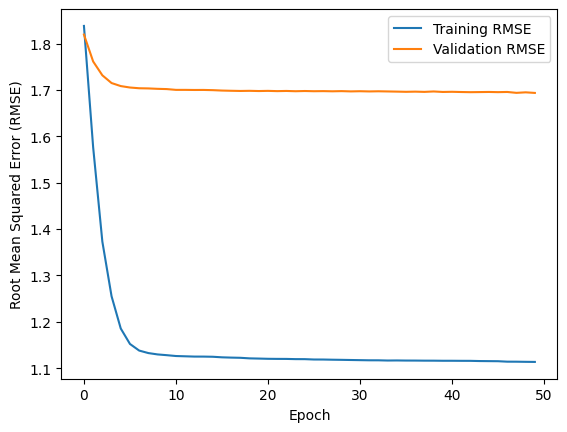

In [51]:
train_rmse, val_rmse = trainer.get_rmse()
plot_rmse(train_rmse, val_rmse)

The training and validation RMSE values indicate that the model's performance is improving slowly over the epochs, but the gap between training and validation RMSE suggests potential overfitting.

## Get recomendations

In [49]:
recommender = RecommenderSystem(model, preprocessor.track_to_track_encoded,
                                preprocessor.name_to_name_encoded,
                                preprocessor.track_encoded_to_track,
                                spotify_track_dataset,
                                device)

In [50]:
recommender.recommend_tracks("Fire - Killer Hertz Remix", top_n=10)

Recommendations based on track name: 'Fire - Killer Hertz Remix'
Track ID: 1FqyrPWyT5kPxS77IGkPku, Track Name: Coolin'
Track ID: 2ccbaU2kyfRbCIBYSt85Zm, Track Name: Slidin'
Track ID: 1zusIxNqJu8i4g6P6hJ2Qa, Track Name: Mercy
Track ID: 2zlPODWNfA81BUtBzdggA9, Track Name: Qué Pasa Con Nuestro Amor
Track ID: 0pf5z9FfyTiAe8VBI6hmuU, Track Name: Cumbia Milagrosa
Track ID: 1VQHF03BhuF6MdeGe0uz6P, Track Name: Os Mais Brabos De Konoha
Track ID: 5p6me2mwQrGfH30eExHn6v, Track Name: Take Five
Track ID: 5Z6zD6DZbzb9XcQMO99hwg, Track Name: Rengoku (Condensed)
Track ID: 11eR3j6v07i70jh1jz6e67, Track Name: Where I'm Standing Now
Track ID: 0PnOZo90GANTX2gFRiqUn7, Track Name: Esta Cobardía


The recommendations span various track IDs and names, suggesting the model is exploring a broad range of options.